In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import chisquare

---

In [13]:
int_len = np.load('interval_lengths.npy')

In [14]:
data_clean = int_len
rate = 1/np.mean(data_clean)

In [25]:
time_horizon = 1000
jump_mult = 2

epsilon = (4.29 * 2 / np.log(time_horizon)) * jump_mult

theoretical_rate = 1/(np.exp(1.17 * 2/epsilon))

In [26]:
print(f"Theoretical rate: {theoretical_rate}, Measured rate: {rate}")

Theoretical rate: 0.3898603702549073, Measured rate: 0.30374613858859906


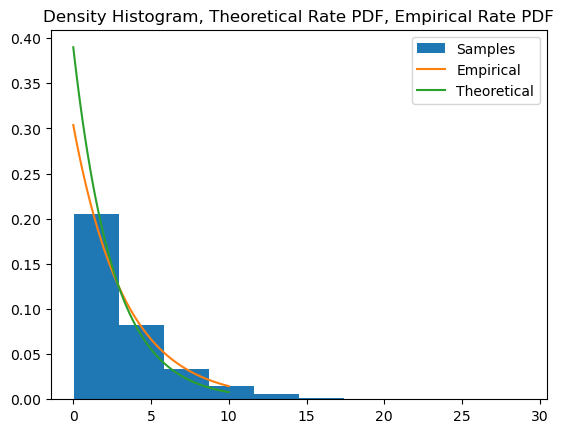

In [17]:
x = np.linspace(0, 10, 100)
y = rate * np.exp(-rate * x)

plt.hist(data_clean, density=True, bins=10, label='Samples')
plt.plot(x, y, label='Empirical')
plt.plot(x, theoretical_rate * np.exp(-theoretical_rate * x), label='Theoretical')
plt.title('Density Histogram, Theoretical Rate PDF, Empirical Rate PDF')
plt.legend()
plt.show()

In [18]:
def exp_cdf(x, rate=theoretical_rate):
    return 1 - np.exp(-rate * x)

In [19]:
x_transformed = exp_cdf(data_clean)
x_sort_trans = np.sort(x_transformed)

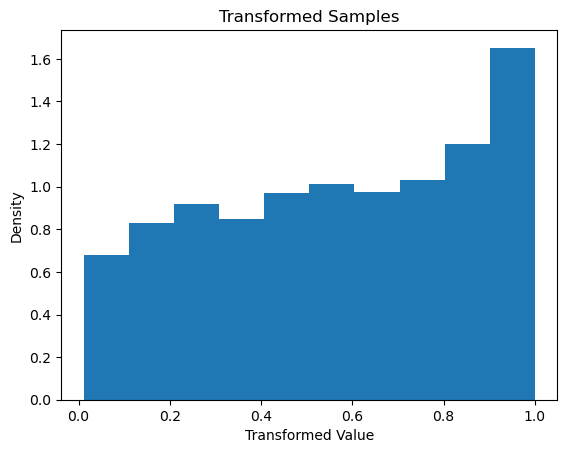

In [20]:
plt.hist(x_transformed, density=True, label='Transformed Samples')
plt.title('Transformed Samples')
plt.ylabel('Density')
plt.xlabel('Transformed Value')
plt.show()

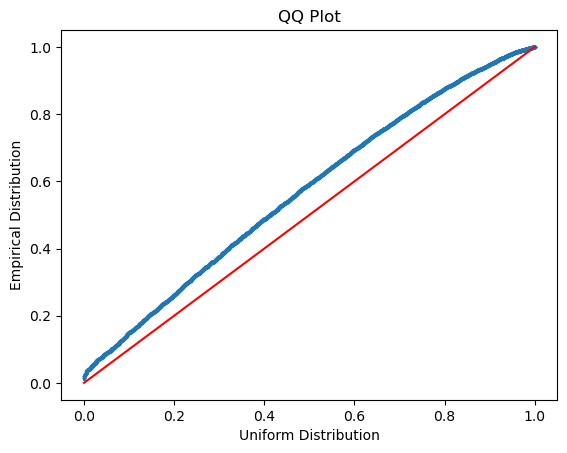

In [21]:
uniform = np.random.uniform(0,1, len(data_clean))
uniform_sort = np.sort(uniform)

plt.scatter(uniform_sort, x_sort_trans, s=2)
plt.title('QQ Plot')
plt.xlabel('Uniform Distribution')
plt.ylabel('Empirical Distribution')
plt.plot([0,1],[0,1], color='red')
plt.show()

In [22]:
stats.chisquare(x_sort_trans)

Power_divergenceResult(statistic=1462.9113883935552, pvalue=1.0)